
<div style="background-color:gold;">

# Т-Банк: поездки на самокатах
    
</div>
- Автор: Пулькина Анастасия


<div style="background-color:lemonchiffon;">


## Цели и задачи проекта

</div>    

**Цель:** Провести разведочный анализ данных (EDA);  
    проверка следующих аналитических гипотез:  
    1) Мужчины используют самокат чаще, чем пользователи женского пола;  
    2) Самыми активными пользователями электросамокатов являются школьники и студенты;  
    3) Пользователи, совершающие короткие поездки (менее 10 минут) приносят большие доход.

<div style="background-color:lemonchiffon;">



## Описание данных

</div>


Для анализа предоставлена данные из группы сервисов Т-город. Представленная база данных содержит информацию из сервиса по аренде электросамокатов «Самокаты» за период с апреля по октябрь 2024. Сервис позволяет арендовать самокаты от Юрента через приложение Т-Банка. 

Датасет содержит следующие переменные: 

 - `order_rk` - Идентификатор заказа (поездки)
 - `party_rk` - Идентификатор клиента
 - `gender_cd` - Пол клиента 
 - `age` - Возраст клиента
 - `education_level` - Уровень образования клиента:  
                            SCH — начальное, среднее  
                            GRD — высшее  
                            UGR — неполное высшее  
                            PGR — два высших  
                            ACD — ученая степень  
 - `marital_status_cd` - Семейный статус человека:   
        MAR — женат/замужем  
        CIV — гражданский брак  
        UNM — холост/не замужем  
        DIV — разведен(а)  
        WID — вдовец/вдова                          
 - `lvn_state_nm` - Регион проживания человека
 - `minute_cost` - Стоимость минуты (условные единицы)
 - `activation_cost` - Стоимости активации
 - `hold_amount` - Размер суммы, которая замораживается на счете в момент взятия самоката
 - `transport_model` - Название модели самоката
 - `distance_km` - Километраж поездки
 - `created_dttm` - Дата и время создания заказа
 - `book_start_dttm` - Дата и время начала поездки
 - `book_end_dttm` - Дата и время завершения поездки
 - `book_time_zone_cd` - Часовой пояс
 - `local_book_start_dttm` - Дата и время начала поездки в часовом поясе человека, который брал самокат
 - `nominal_price_rub_amt` - Стоимость поездки
 - `loyalty_accrual_rub_amt` - Размер выплаченного кэшбэка в рублях
 - `loyalty_accrual_bns_amt` - Размер выплаченного кэшбэка в бонусах (если оплата происходила с помощью кредитной карты)

<div style="background-color:lemonchiffon;">
    
## Содержимое проекта
</div>

1. [Загрузка и знакомство с данными](#download_data)
2. [Предобработка данных](#data_preprocessing)
3. [Исследовательский анализ данных](#eda)
4. [Проверка гипотез](#stat)
5. [Итоговый вывод](#summary)
---

<div style="background-color:lemonchiffon;">

## 1. Загрузка и знакомство с данными
<a id='download_data'></a>
    
</div>


In [1]:
# Импортирую необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install matplotlib-venn
from matplotlib_venn import venn2
from scipy import stats
from scipy.stats import ttest_ind
!pip install missingno
import missingno as msno
!pip install phik
from phik import phik_matrix
import requests

In [2]:
# Загружаю датасет

public_key = "https://disk.yandex.ru/d/uOPgUbaeY9-BUA"  


# Запрашиваю у API Яндекс.Диска прямой (download) URL для чтения файла
api_endpoint = "https://cloud-api.yandex.net/v1/disk/public/resources/download"
params = {"public_key": public_key}
response = requests.get(api_endpoint, params=params)
response.raise_for_status()  

download_url = response.json()["href"]
# Теперь download_url — это прямой адрес к самому файлу без CAPTCHA

# Считываю CSV напрямую из полученного download_url
df = pd.read_csv(download_url)

df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [5]:
# ищю пропуски 
df_missing = df.copy() # копия текущего датасета
missing = pd.DataFrame({
    'Кол-во пропусков': df_missing.isnull().sum(), 
    'Доля пропусков': df_missing.isnull().mean().round(4)})
           
missing.sort_values(by='Кол-во пропусков', ascending=False).style.background_gradient(cmap='coolwarm')

,Кол-во пропусков,Доля пропусков
loyalty_accrual_bns_amt,374801,0.944700
education_level_cd,206690,0.521000
marital_status_cd,179020,0.451200
lvn_state_nm,34177,0.086100
loyalty_accrual_rub_amt,29757,0.075000
gender_cd,2921,0.007400
created_dttm,0,0.000000
nominal_price_rub_amt,0,0.000000
local_book_start_dttm,0,0.000000
book_time_zone_cd,0,0.000000


### Промежуточный вывод
Предоставленный датасет о пользовании электросамокатами через сервис Т-Город содержит 20 столбцев и 396749 строки, в которых представлена информация об активности использования электросамокатов пользователями сервиса Т-Город. 

После первичного знакомства с данными можно сделать следующие выводы:

 * Датасет содержит пропуски в столбцах `gender_cd` (2921 - 0.7%), `education_level_cd` (206690 - 52%), `marital_status_cd` (179020 - 45%), `lvn_state_nm` (34177 - 8,6%), `loyalty_accrual_rub_amt`(374801 - 94%), `loyalty_accrual_bns_amt` (29757 - 7,5%).
 * Названия столбцев соответствуют их содержимому. 
 * Тип данных в столбцах корректный, кроме столбцев с датами `created_dttm`, `book_start_dttm`, `book_end_dttm`, `local_book_start_dttm`.  

<div style="background-color:lemonchiffon;">
    
## 2. Предобработка данных
<a id='data_preprocessing'></a>
</div>

In [6]:
# Проверю полные дубликаты в датафрейме
print("Количество дубликатов:", df.duplicated().sum())

Количество дубликатов: 0


In [7]:
 # Проверю неявные дубликаты. Неявные дубликаты буду искать по совпадению в идентифткаторе заказа и пользователя 
print("Количество неявных дубликатов:", df.duplicated(subset=['order_rk','party_rk']).sum())

Количество неявных дубликатов: 0


Дубликатов нет. Перейдем к приведению типов данных к дате. 

In [8]:
# приведем тип данных к формату даты
for column in ['created_dttm', 'book_start_dttm', 'book_end_dttm', 'local_book_start_dttm']:
    df[column] = pd.to_datetime(df[column])
    print(f"Тип данных столбца {column} после преобразования:", df[column].dtype)

Тип данных столбца created_dttm после преобразования: datetime64[ns]
Тип данных столбца book_start_dttm после преобразования: datetime64[ns]
Тип данных столбца book_end_dttm после преобразования: datetime64[ns]
Тип данных столбца local_book_start_dttm после преобразования: datetime64[ns]


In [9]:
# и проверим возможность понижения разрядности чисел
for column in ['order_rk', 'party_rk', 'age', 'minute_cost', 'activation_cost',
       'hold_amount', 'distance_km', 'book_time_zone_cd','nominal_price_rub_amt',
       'loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']:
    df[column] = pd.to_numeric(df[column], downcast='integer')
    print(f"Тип данных столбца {column} после преобразования:", df[column].dtype)

Тип данных столбца order_rk после преобразования: int32
Тип данных столбца party_rk после преобразования: int32
Тип данных столбца age после преобразования: int8
Тип данных столбца minute_cost после преобразования: float64
Тип данных столбца activation_cost после преобразования: int8
Тип данных столбца hold_amount после преобразования: int16
Тип данных столбца distance_km после преобразования: float64
Тип данных столбца book_time_zone_cd после преобразования: int8
Тип данных столбца nominal_price_rub_amt после преобразования: float64
Тип данных столбца loyalty_accrual_rub_amt после преобразования: float64
Тип данных столбца loyalty_accrual_bns_amt после преобразования: float64


Дальше поработаю с пропусками. Посмотрю, есть ли в них какая-то корреляция.

<Axes: >

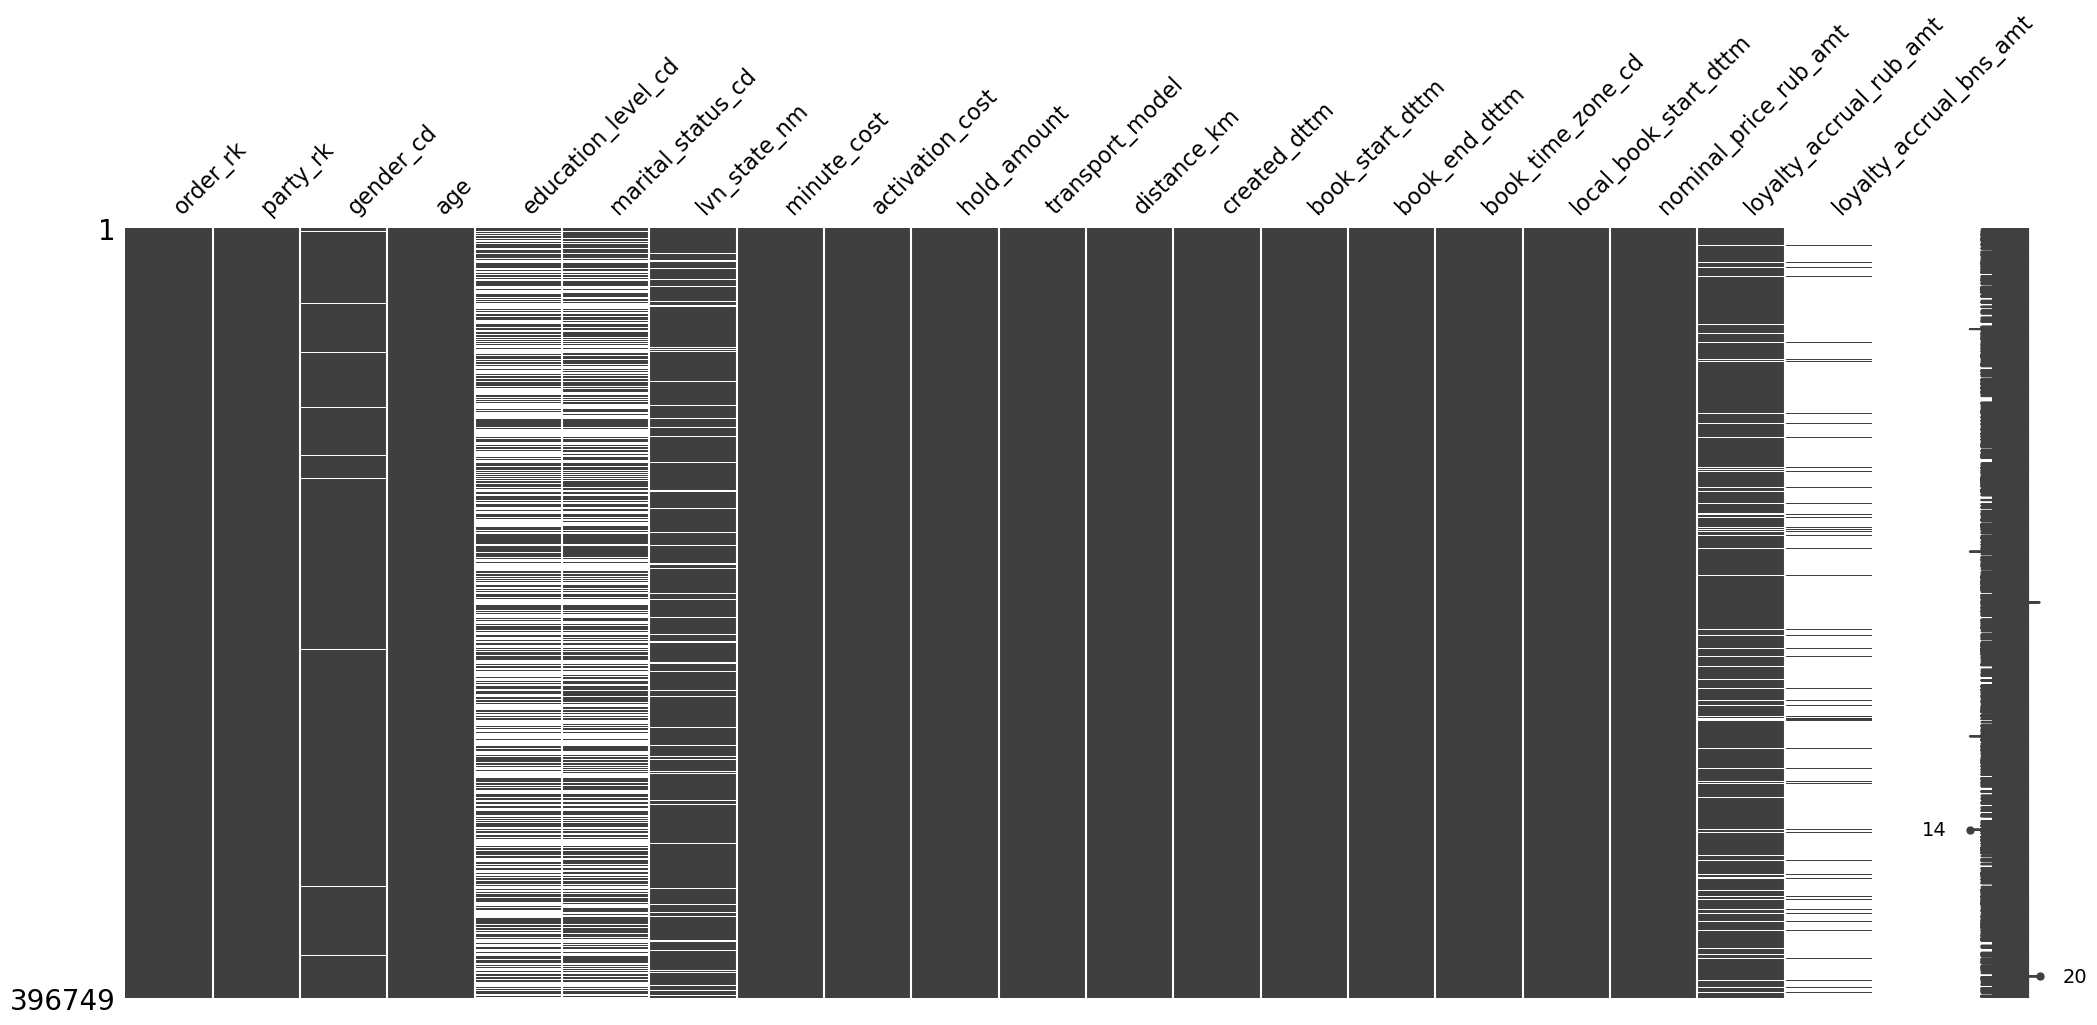

In [10]:
msno.matrix(df)

<Axes: >

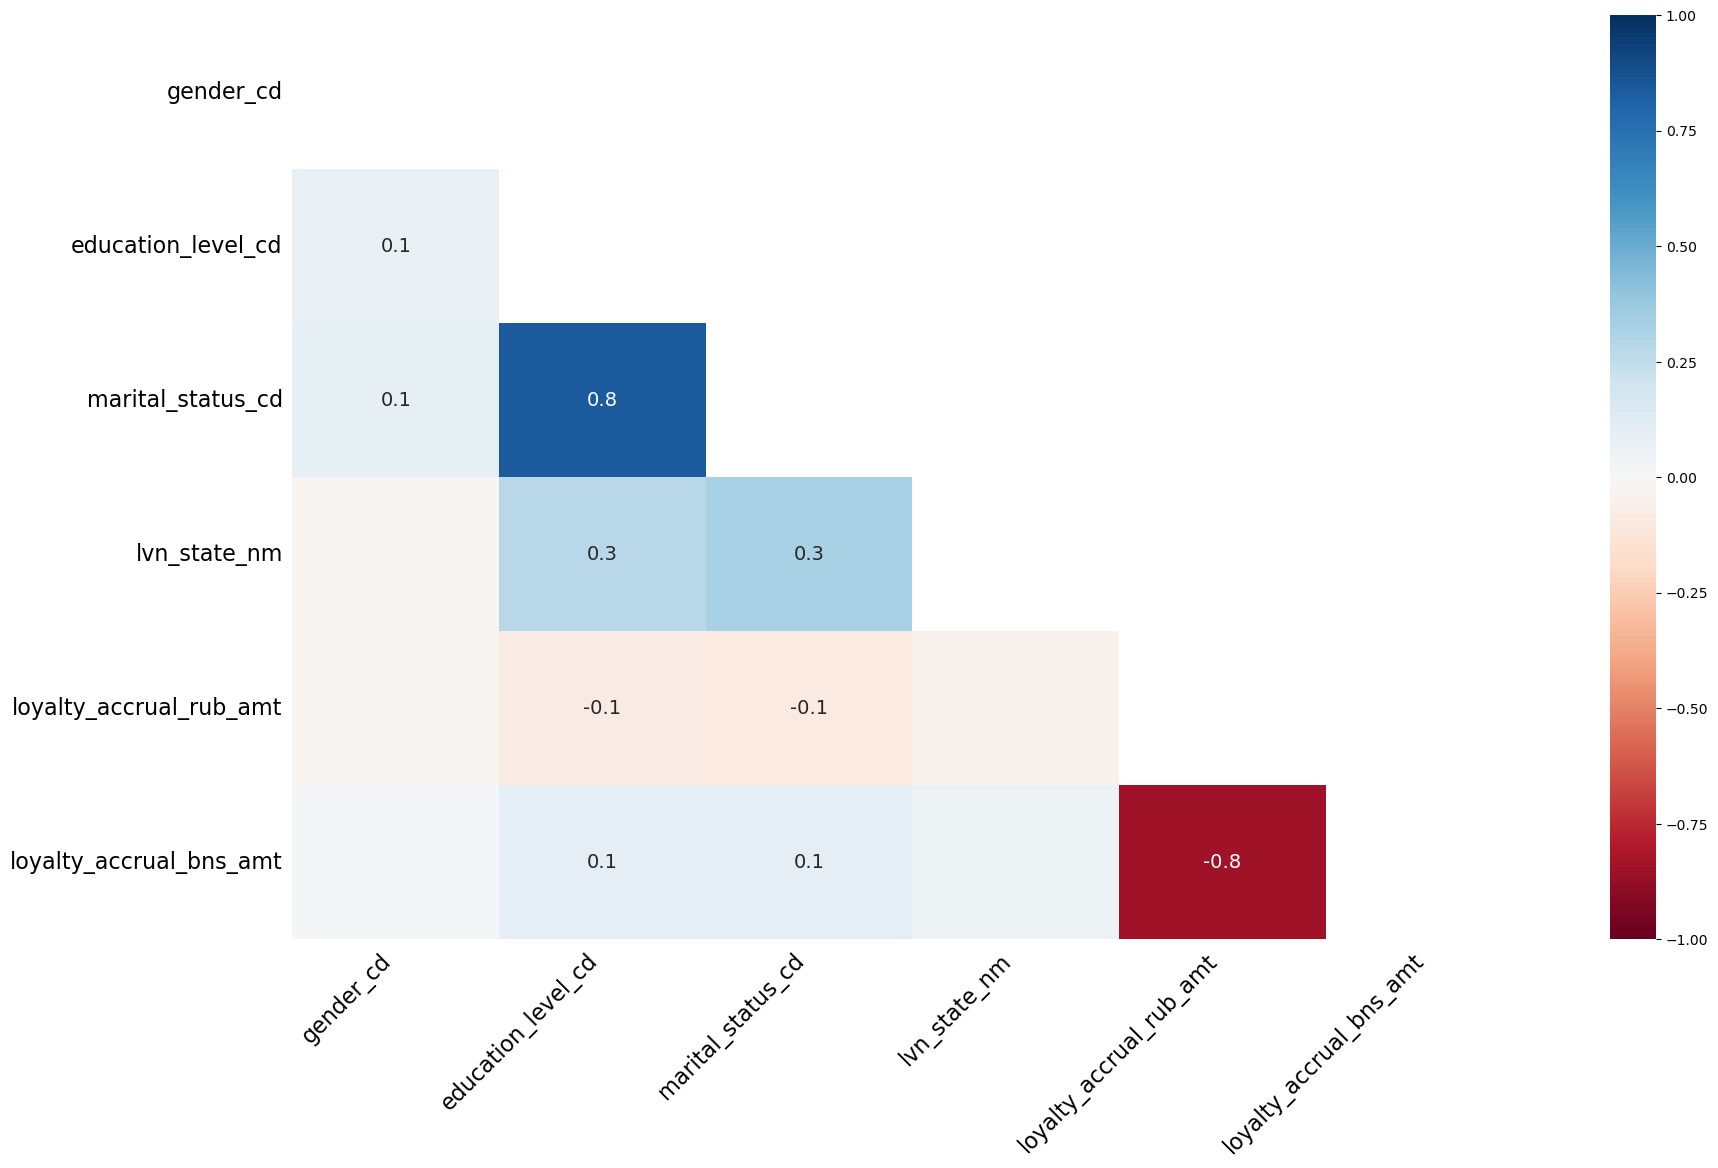

In [11]:
msno.heatmap(df)

Есть корреляция в пропусках данных между столбцами `marital_status_cd` и `education_level_cd`; и обратная корреляция между столбцами `loyalty_accrual_rub_amt` и `loyalty_accrual_bns_amt`. 

### Промежуточный вывод
Ни явных ни неявных дубликатов в датасете не обнаружено. Тип данных в столбцах с датами приведен к типу datetime64[ns]. У переменных, содержащие числовые данные, пониженна разрядность.  Обнаружена корреляция в пропусках данных между столбцами `marital_status_cd` и `education_level_cd`; и обратная корреляция между столбцами `loyalty_accrual_rub_amt` и `loyalty_accrual_bns_amt`. Пропуски на данном этапе удалять не буду и заменять их ничем тоже пока не буду. 

<div style="background-color:lemonchiffon;">
    
## Исследовательский анализ данных
<a id='eda'></a>
</div>

In [12]:
# Посмотрим на описательную статистику числовых переменных в датасете.
df[['age', 'minute_cost', 'activation_cost', 'hold_amount', 'distance_km', 'nominal_price_rub_amt','loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']].describe()

,age,minute_cost,activation_cost,hold_amount,distance_km,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000,21948.000000
mean,31.544006,7.288688,42.593226,299.983869,3.681031,127.647694,37.516121,127.789319
std,9.434545,1.289492,11.989974,1.939153,141.862349,100.122365,75.208560,496.812143
min,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,-161.940000,1.000000
25%,24.000000,6.490000,30.000000,300.000000,0.941054,80.840000,11.240000,43.000000
50%,31.000000,7.490000,50.000000,300.000000,1.729883,103.940000,18.730000,62.000000
75%,37.000000,8.220000,50.000000,300.000000,3.063694,142.100000,35.060000,81.000000
max,94.000000,19.990000,50.000000,500.000000,56012.640308,5627.640000,3185.000000,55429.360970


Максимальный возраст пользователя 94 года вызывает сомнения. Надо проверить распределение в этом столбце. Есть поездки, которые длились 0 км и есть поездки, стоимость которых составила 0 условных единиц. Наверно, такие поездки можно считать неуспешными.  
Максимальное значение расстояния, которое проехал пользователь за время бронирования - 56012.640308	км. Это явно ошибка.  
Визуализирую распределение числовых переменных. 

In [13]:
# Посмотрим на те сессии, где расстояние поездки было очень велико
df[df['distance_km']>5000].sort_values(by = 'distance_km', ascending = False).head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
11244,252634726,695658540,M,23,SCH,UNM,ЯРОСЛАВСКАЯ ОБЛ,4.99,30,300,SL,56012.640308,2024-06-09 00:01:35,2024-06-09 00:01:38.297341,2024-06-09 00:17:38.340000,3,2024-06-09 00:01:38.297341,109.84,10.98,NaN
175173,261054571,293397690,M,30,UGR,UNM,РЕСП МОРДОВИЯ,8.49,30,300,Max,32742.764788,2024-07-19 13:11:27,2024-07-19 13:11:31.981187,2024-07-19 13:14:31.402906,3,2024-07-19 13:11:31.981187,55.47,7.55,NaN
313313,274439844,58660326,M,34,GRD,MAR,МОСКОВСКАЯ ОБЛ,6.53,50,300,SL,25834.347823,2024-09-06 07:23:50,2024-09-06 07:23:54.260000,2024-09-06 07:26:38.857011,3,2024-09-06 07:23:54.260000,69.59,13.92,NaN
300080,355425512,865803190,M,31,NaN,NaN,NaN,8.49,50,300,SL,22317.776290,2024-10-18 12:38:52,2024-10-18 12:38:57.624000,2024-10-18 13:03:44.795520,3,2024-10-18 12:38:57.624000,262.25,48.90,NaN
385466,266073524,70699616,M,46,GRD,MAR,Г МОСКВА,8.49,50,300,ES100,21402.841155,2024-08-07 13:38:24,2024-08-07 13:38:29.075803,2024-08-07 14:29:19.592234,3,2024-08-07 13:38:29.075803,482.99,72.30,NaN


In [14]:
# Посмотрим на те сессии, где расстояние поездки было мало
df[df['distance_km']<5].sort_values(by = 'distance_km', ascending = False).head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
359443,255213261,250335914,M,27,NaN,NaN,Г МОСКВА,8.99,50,300,SL,4.999974,2024-06-27 20:46:37,2024-06-27 20:46:41.851461,2024-06-27 21:05:12.254633,3,2024-06-27 20:46:41.851461,220.81,22.08,NaN
67713,265815294,970832562,M,41,NaN,NaN,NaN,6.49,50,300,SL,4.999946,2024-08-06 04:40:43,2024-08-06 04:40:47.432116,2024-08-06 04:51:51.629348,3,2024-08-06 04:40:47.432116,127.88,51.15,NaN
165653,349989806,153782551,M,36,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,8.49,30,300,ES400,4.999897,2024-09-28 17:58:08,2024-09-28 17:58:10.822000,2024-09-28 18:33:20.296249,3,2024-09-28 17:58:10.822000,335.64,33.57,NaN
391125,323921805,428086989,M,21,UGR,UNM,ОМСКАЯ ОБЛ,9.49,50,300,SL,4.999874,2024-09-14 11:14:38,2024-09-14 11:14:42.986000,2024-09-14 11:36:42.186689,3,2024-09-14 11:14:42.986000,258.78,51.76,NaN
22035,261320226,1165327584,F,21,NaN,NaN,РОСТОВСКАЯ ОБЛ,4.99,45,300,Max,4.999804,2024-07-20 10:45:46,2024-07-20 10:45:50.137741,2024-07-20 10:58:04.803849,3,2024-07-20 10:45:50.137741,109.87,10.99,NaN


Можно было бы подумать, что это техническая ошибка. Например в определенный промежуток дат дистанция записывалась не в км, а в метрах. Или что данные с какой-то модели самокатов записываются неверно. Но все эти предположения неверные. Так как и для больших и для маленьких растояний есть и те и другие даты и самокаты. 

/var/folders/dy/3kj9zfdj491_10x0fj1n6t8c0000gn/T/ipykernel_29253/1449638233.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,5000)


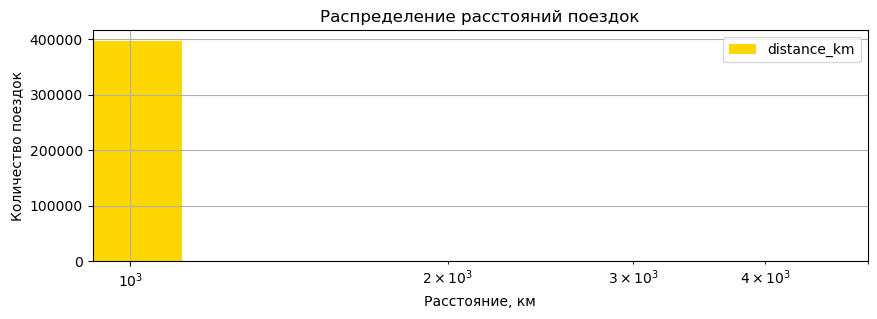

In [15]:
df['distance_km'].plot(kind='hist',
                   title='Распределение расстояний поездок',
                   legend=True,
                   ylabel='Количество поездок',
                   xlabel='Расстояние, км',
                   color = 'gold',
                   bins = 50,
                   rot=0, 
                   figsize=(10, 3))

plt.xscale('log')
plt.xlim(0,5000)
plt.grid()
plt.legend()
plt.show()

In [16]:
# Напишем функцию для анализа распределения числовых переменных 
def plot_box_plot(df, column, title, ylabel, xlabel):
    '''
    Функция для анализа распределения метрики по признакам:
    df - датафрейм с данными для анализа;
    column - str, название столбца;
    title - str, заголовок графика;
    ylabel - str, подпись по оси Y;
    xlabel - str, подпись по оси X.
    '''
    df[column].plot(kind='box',
                   title=title,
                   legend=True,
                   ylabel=ylabel,
                   xlabel=xlabel,
                   vert = False, 
                   color = 'gold',
                   rot=0, 
                   figsize=(10, 3))

    # Рассчитываем общее значение value по всем данным
    mean_col = df[column].mean()

    # Наносим на график линию с значением value по всем данным
    plt.axvline(mean_col, color='red',
                linestyle='--', linewidth=1,
                label=f'Среднее значение {round(mean_col,2)}')

    plt.grid()
    plt.legend()
    plt.show()

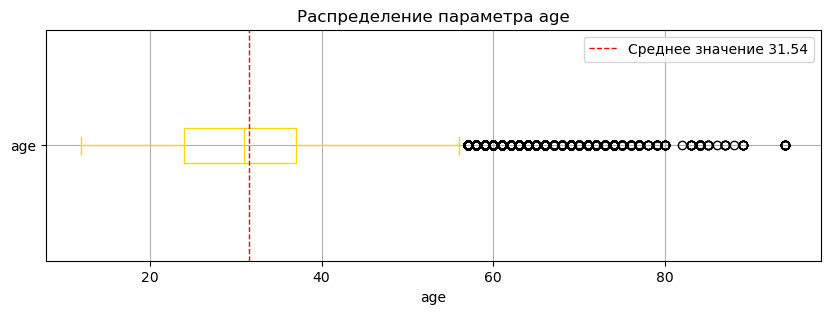

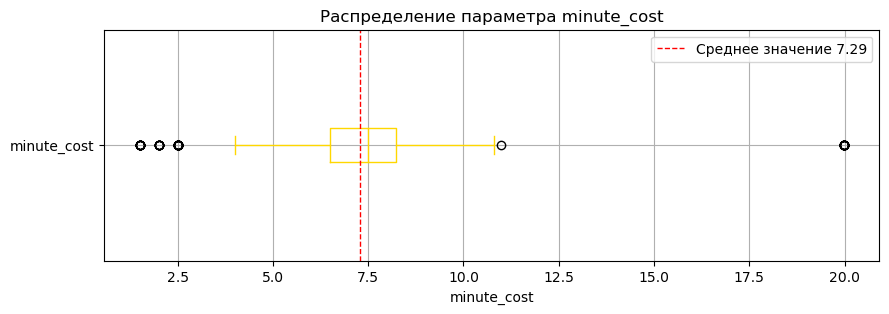

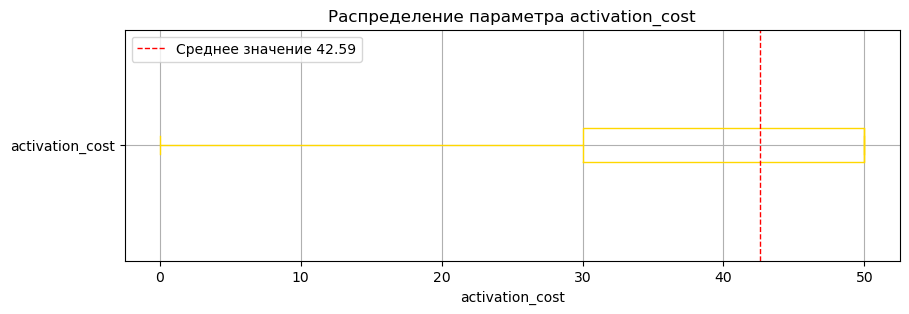

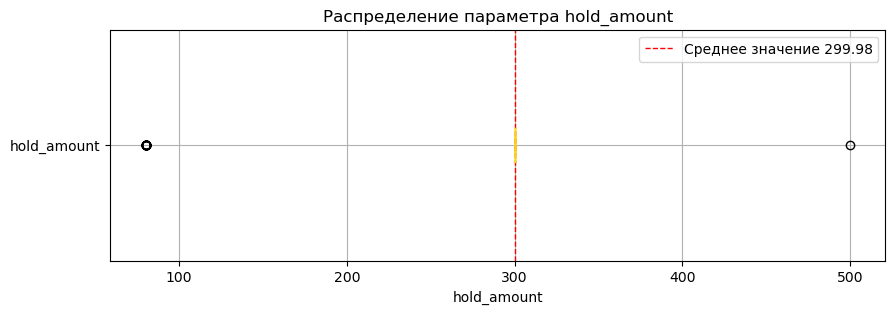

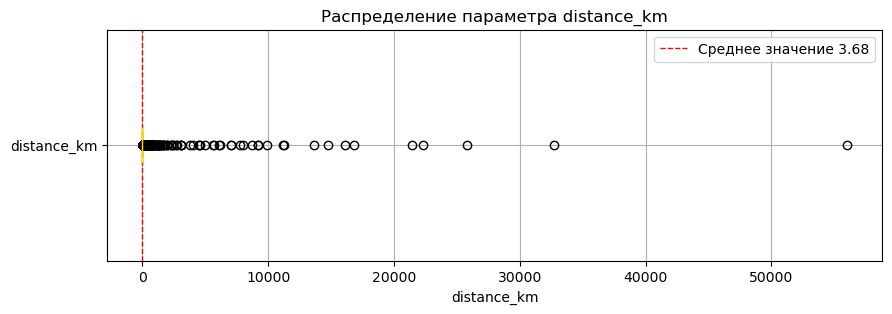

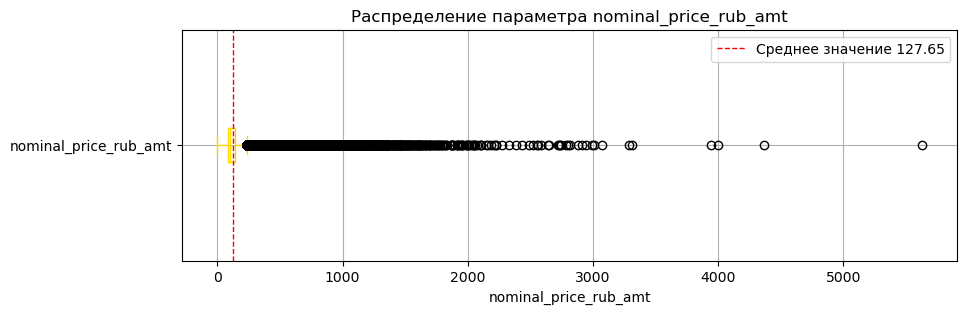

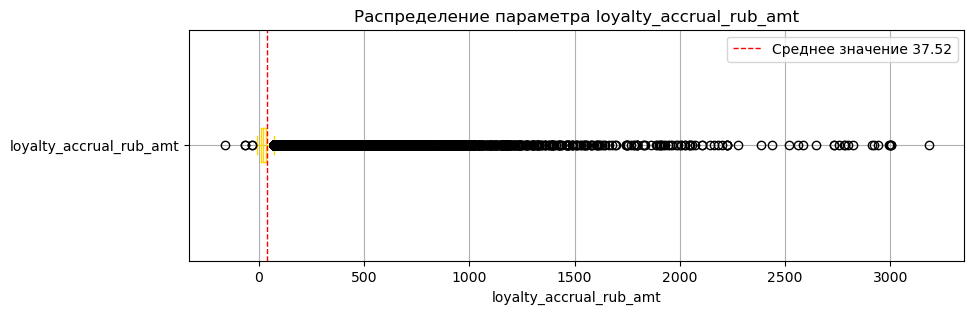

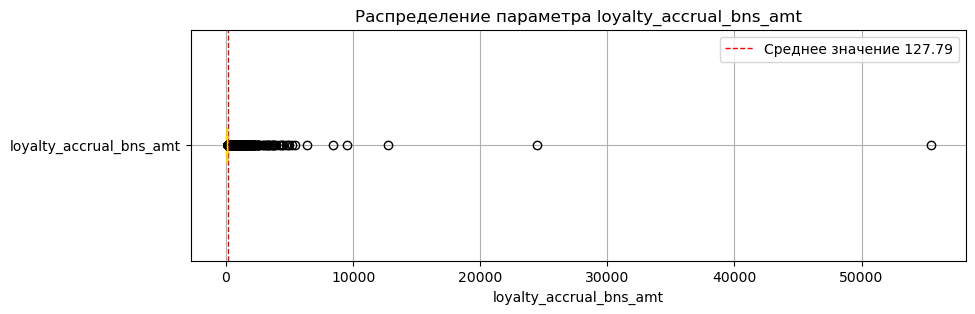

In [17]:
for column in df[['age', 'minute_cost', 'activation_cost', 'hold_amount', 'distance_km', 'nominal_price_rub_amt','loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']]:
    title=f'Распределение параметра {column}'
    xlabel=column
    ylabel=''
    plot_box_plot(df, column, title, ylabel, xlabel)

Никакие выбросы удалять не буду, так как кажется, что все они вероятны. Плюс ни в одном из параметров слишком высокие или слишком низкие переменные не сдвигают критично среднее относительно мелианы.

In [18]:
# Проверим число уникальных значений для некоторых переменных
for column in ['gender_cd', 'education_level_cd', 'marital_status_cd', 'lvn_state_nm', 'activation_cost',
       'hold_amount', 'transport_model', 'book_time_zone_cd']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().nunique())
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце gender_cd:
2
['F' 'M' nan]

Уникальные значения в столбце education_level_cd:
5
['ACD' 'GRD' 'PGR' 'SCH' 'UGR' nan]

Уникальные значения в столбце marital_status_cd:
5
['CIV' 'DIV' 'MAR' 'UNM' 'WID' nan]

Уникальные значения в столбце lvn_state_nm:
212
['ISRAEL' 'АЛТАЙСКИЙ КРАЙ' 'АМУРСКАЯ ОБЛ'
 'АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА' 'АО ЯМАЛО-НЕНЕЦКИЙ'
 'АОБЛ ЕВРЕЙСКАЯ' 'АРХАНГЕЛЬСКАЯ ОБЛ' 'АСТРАХАНСКАЯ ОБЛ'
 'АСТРАХАНСКАЯ ОБЛАСТЬ' 'БАШКОРТОСТАН РЕСП' 'БЕЛГОРОДСКАЯ ОБЛ'
 'БРЕСТСКАЯ ОБЛАСТЬ' 'БРЯНСКАЯ ОБЛ' 'ВЛАДИМИРСКАЯ ОБЛ' 'ВОЛГОГРАДСКАЯ ОБЛ'
 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ' 'ВОЛОГОДСКАЯ ОБЛ' 'ВОРОНЕЖСКАЯ ОБЛ' 'Г БАЙКОНУР'
 'Г МОСКВА' 'Г САМАРА' 'Г САНКТ-ПЕТЕРБУРГ' 'Г СЕВАСТОПОЛЬ' 'Г. ЗЕЛЕНОГРАД'
 'Г. МОСКВА' 'Г. САНКТ-ПЕТЕРБУРГ' 'ГОМЕЛЬСКАЯ ОБЛ' 'ГОМЕЛЬСКАЯ ОБЛАСТЬ'
 'ГОРОД МОСКВА' 'ГОРОД САНКТ-ПЕТЕРБУРГ' 'ДОНЕЦКАЯ НАРОДНАЯ РЕСП'
 'ЕВРЕЙСКАЯ АОБЛ' 'ЗАБАЙКАЛЬСКИЙ КРАЙ' 'ЗАПОРОЖСКАЯ ОБЛ' 'ИВАНОВСКАЯ ОБЛ'
 'ИРКУТСКАЯ ОБЛ' 'ИРКУТСКАЯ ОБЛАСТЬ' 'КАЛИНИНГРАДСКАЯ

Израиль и СОЕДИНЕННЫЕ ШТАТЫ АМЕРИКИ в качестве региона проживания пользователя вызывает сомнение. Наверно, регион проживания и регион использования могут отличаться. Но переменной с регионом использования нет в датасете. Данные в переменной `lvn_state_nm` очень некачественные. Необходимо оптимизировать и уменьшить число ошибок/описок при заполнении этого поля. Убрать возможность пользователя руками вводить название региона, добавить всплывающие списки. Это уменьшит число описок и ускорит обработку данных в дальнейшем.

In [19]:
# посмотрим на распределение пользователей и заказов в зависимости от уровня образования
distr_edu_lvl = df.groupby('education_level_cd').agg({'party_rk': 'nunique', # общее число уникальных пользователей 
                                            'order_rk': 'nunique' # число заказов
                                             }).reset_index().sort_values(by = 'party_rk')
distr_edu_lvl.columns = ['education_level_cd', 'unique_users_count', 'unique_orders_count'] # переименуем колонки
distr_edu_lvl['order_per_user'] = round(1.0*distr_edu_lvl.unique_orders_count/distr_edu_lvl.unique_users_count,2)
distr_edu_lvl

,education_level_cd,unique_users_count,unique_orders_count,order_per_user
0,ACD,231,1325,5.74
2,PGR,733,4224,5.76
4,UGR,5764,38896,6.75
3,SCH,8207,51273,6.25
1,GRD,15269,94341,6.18


<Figure size 1000x600 with 0 Axes>

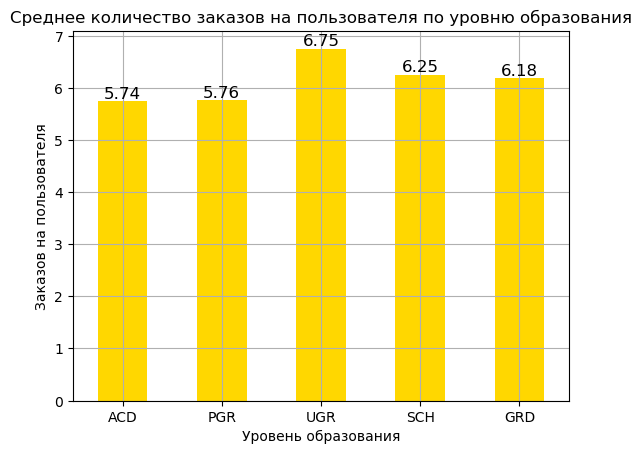

In [20]:
plt.figure(figsize=(10, 6))
ax = distr_edu_lvl.plot(
    x='education_level_cd',  
    y='order_per_user',
    kind='bar',
    legend=False,
    color='gold',
    rot = 0,
    title='Среднее количество заказов на пользователя по уровню образования',
    ylabel='Заказов на пользователя',
    xlabel='Уровень образования',
    grid=True
)

# Добавление значений на столбцы
for i, v in enumerate(distr_edu_lvl['order_per_user']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)


plt.show()

Больше всего среди пользователей сервиса людей с высшим образованием (15269), дольше следуют школьники (8207), меньше всего людей с ученой степенью (231). При этом больше всего заказов на одного пользователя приходяится в группе людей не окончивших ВУЗ (6.75),  далее школьники (6.25). Распределение довольно равномерное. Что говорит о том, что пользователи одинаково активно арендуют самокаты вне зависимости от уровня образования.  

In [21]:
# посмотрим на распределение пользователей и заказов в зависимости от пола
distr_gender = df.groupby('gender_cd').agg({'party_rk': 'nunique', # общее число уникальных пользователей 
                                            'order_rk': 'nunique' # число заказов
                                             }).reset_index().sort_values(by = 'party_rk')
distr_gender.columns = ['gender_cd', 'unique_users_count', 'unique_orders_count'] # переименуем колонки
distr_gender['order_per_user'] = round(1.0*distr_gender.unique_orders_count/distr_gender.unique_users_count,2)
distr_gender

,gender_cd,unique_users_count,unique_orders_count,order_per_user
0,F,12163,58370,4.80
1,M,51399,335458,6.53


<Figure size 1000x600 with 0 Axes>

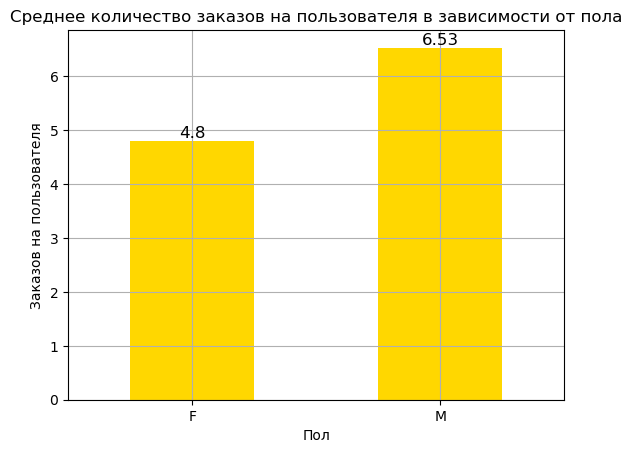

In [22]:
plt.figure(figsize=(10, 6))
ax = distr_gender.plot(
    x='gender_cd',  
    y='order_per_user',
    kind='bar',
    legend=False,
    color='gold',
    rot = 0,
    title='Среднее количество заказов на пользователя в зависимости от пола',
    ylabel='Заказов на пользователя',
    xlabel='Пол',
    grid=True
)

# Добавление значений на столбцы
for i, v in enumerate(distr_gender['order_per_user']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)


plt.show()

Число мужчин, использующих сервис, почти в пять раз превышает число женщин, и число заказов у мужчин (6.53) в среднем выше, чем у пользователей женского пола (4.80). 

In [23]:
# посмотрим на распределение пользователей и заказов в зависимости от семейного статуса
distr_status = df.groupby('marital_status_cd').agg({'party_rk': 'nunique', # общее число уникальных пользователей 
                                            'order_rk': 'nunique' # число заказов
                                             }).reset_index().sort_values(by = 'party_rk')
distr_status.columns = ['marital_status_cd', 'unique_users_count', 'unique_orders_count'] # переименуем колонки
distr_status['order_per_user'] = round(1.0*distr_status.unique_orders_count/distr_status.unique_users_count,2)
distr_status

,marital_status_cd,unique_users_count,unique_orders_count,order_per_user
4,WID,129,718,5.57
1,DIV,1850,11820,6.39
0,CIV,2595,15036,5.79
2,MAR,13266,74061,5.58
3,UNM,16631,116094,6.98


<Figure size 1000x600 with 0 Axes>

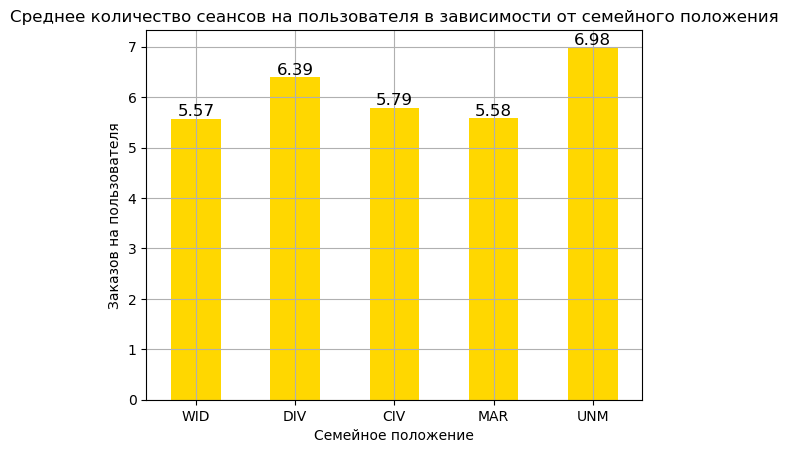

In [24]:
plt.figure(figsize=(10, 6))
ax = distr_status.plot(
    x='marital_status_cd',  
    y='order_per_user',
    kind='bar',
    legend=False,
    color='gold',
    rot = 0,
    title='Среднее количество сеансов на пользователя в зависимости от семейного положения',
    ylabel='Заказов на пользователя',
    xlabel='Семейное положение',
    grid=True
)

# Добавление значений на столбцы
for i, v in enumerate(distr_status['order_per_user']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)


plt.show()

Больше всего заказов приходит на незамужних/неженатых людей (6.98), что ожидаемо, ведь наибольшее число заказов у людей без образивания (школьники) и студентов (не оконченное высшее). Меньше всего заказов среди вдов/вдовцев и женатых/замужних пользователей. 

In [25]:
# посмотрим на распределение пользователей и заказов в зависимости от модели самоката
distr_transport = df.groupby('transport_model').agg({'party_rk': 'nunique', # общее число уникальных пользователей 
                                            'order_rk': 'nunique' # число заказов
                                             }).reset_index().sort_values(by = 'party_rk')
distr_transport.columns = ['transport_model', 'unique_users_count', 'unique_orders_count'] # переименуем колонки
distr_transport['order_per_user'] = round(1.0*distr_transport.unique_orders_count/distr_transport.unique_users_count,2)
distr_transport.sort_values(by = 'order_per_user', ascending = False)

,transport_model,unique_users_count,unique_orders_count,order_per_user
1,E,10895,67666,6.21
11,SL,40480,241247,5.96
10,Max,18534,70301,3.79
6,ES400,1239,4152,3.35
9,MK,319,1054,3.30
5,ES200,1026,3325,3.24
12,Techno,86,228,2.65
4,ES100,1142,2829,2.48
3,ES-08S,395,911,2.31
7,LB,52,115,2.21


В топ-5 наиболее часто используемых моделей самокатов входят модели: E, SL, Max, ES400, MK. Однако, возможно, таких самокатов просто больше

In [26]:
# Посмотрим на длительность бронирований
df['date_event'] = df['book_start_dttm'].dt.date
df['book_duration']= df['book_end_dttm']-df['book_start_dttm']
#df['book_duration']=df['book_duration'].dt.components['minutes']
df['book_duration'].describe()

count                       396749
mean     0 days 00:11:26.459336646
std      0 days 00:13:10.490068392
min         0 days 00:00:02.004000
25%         0 days 00:04:45.783419
50%         0 days 00:07:46.119018
75%         0 days 00:13:22.262417
max         0 days 11:55:10.332373
Name: book_duration, dtype: object

In [27]:
df['book_duration'].dtypes

dtype('<m8[ns]')

Среднее продолжтительность бронирований - 11,5 минут. Максимальная - почти 12 часов. Скорее всего, пользователь забыл завершить бронирование. Минимальная - 2 секунды. 

Поздки продолжительностью перее минуты буду считать наудачными. Что пользователю что-то не понравилось и он отказался от поездки. Добавить столбец, несущий информацию об успешности поездки. Посчитаем долю успешных поездок. 

In [28]:
# Создадим новый столбец
def create_is_successful(x):
    if x<pd.Timedelta(minutes=1):
        return 0
    else: 
        return 1

In [29]:
df['is_successful'] = df['book_duration'].apply(create_is_successful)
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,date_event,book_duration,is_successful
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30,300,...,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,2024-08-07,0 days 00:20:30.014272,1
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50,300,...,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,2024-10-17,0 days 00:06:54.833607,1
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30,300,...,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,2024-09-19,0 days 00:06:50.688372,1
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50,300,...,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,2024-10-04,0 days 00:02:18.562918,1
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50,300,...,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,2024-07-10,0 days 00:10:05.429337,1


In [30]:
# Посмотрим на распределение числа успешных сессий в зависимости от дней
successful_orders = df.groupby('date_event').agg({'is_successful': 'sum', # число успешных сессий
                                            'order_rk': 'nunique' # число заказов 
                                             }).reset_index()
successful_orders.columns = ['date_event', 'successful_orders', 'unique_orders_count'] # переименуем колонки
successful_orders.head()

,date_event,successful_orders,unique_orders_count
0,2024-04-07,1,1
1,2024-04-09,3,3
2,2024-04-10,2,2
3,2024-04-11,1,1
4,2024-04-12,2,2


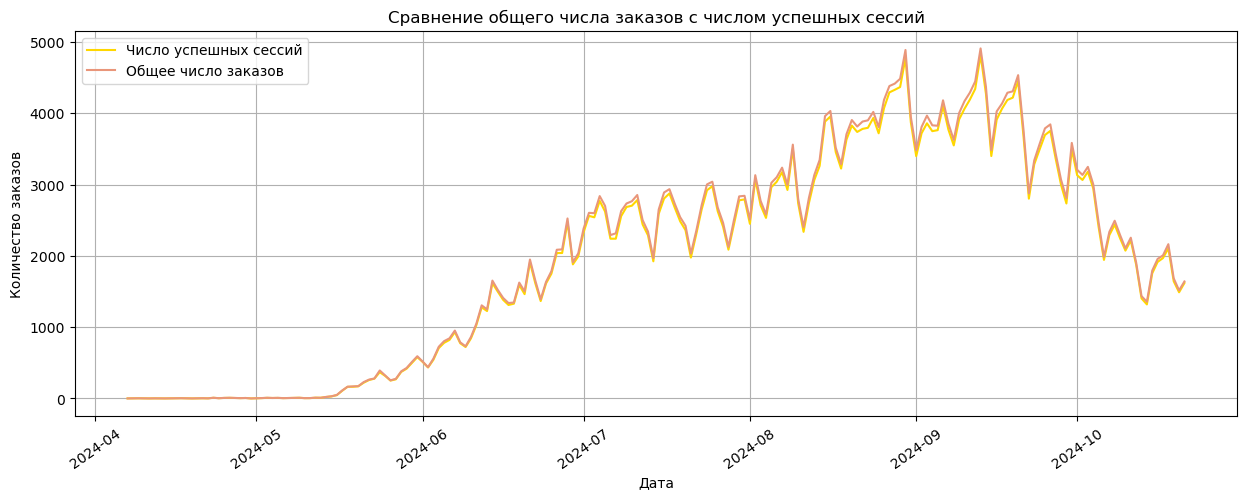

In [31]:
# Построю линейные графики общего числа пользователей и общего числа заказов по дням

x = successful_orders.date_event.unique() # задаем ось Ох
y_a = successful_orders.successful_orders # группы по оси Оy
y_b = successful_orders.unique_orders_count 

plt.figure(figsize=(15, 5))
plt.plot(x, y_a, label ='Число успешных сессий', color = 'gold')
plt.plot(x, y_b,label ='Общее число заказов', color = 'darksalmon')

plt.xlabel("Дата")
plt.xticks(rotation=35) 
plt.grid(True)
plt.ylabel("Количество заказов")
plt.legend()
plt.title('Сравнение общего числа заказов с числом успешных сессий')
plt.show()

Число неуспешных сессий крайне мало. 

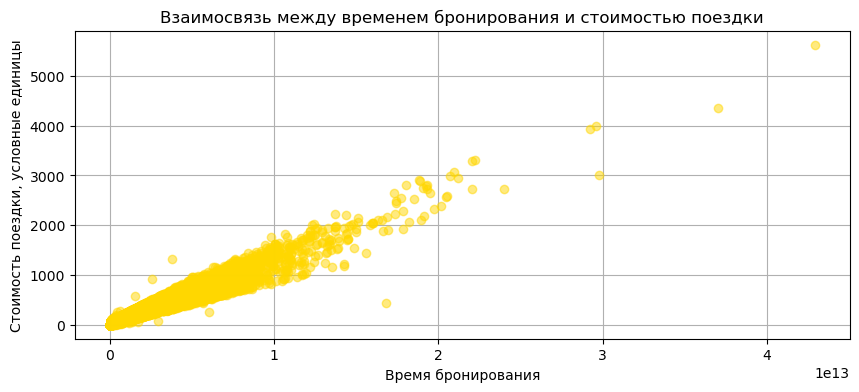

In [32]:
# Посмотрим на Взаимосвязь между временем бронирования и стоимостью поездки
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(df['book_duration'],
         df['nominal_price_rub_amt'],
         marker='o', 
         linestyle='', 
         alpha=0.5, color = 'gold')

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между временем бронирования и стоимостью поездки')
plt.xlabel('Время бронирования')
plt.ylabel('Стоимость поездки, условные единицы')
plt.grid()
#plt.yscale('log')
#plt.xscale('log')

# Отображаем график
plt.show() 

Логично, чем больше время бронирования, тем дороже. Потому что пользователь платит за время использования самоката.   
Посмотрим на зависимость стоимости поездки от расстояния поездки в км.  

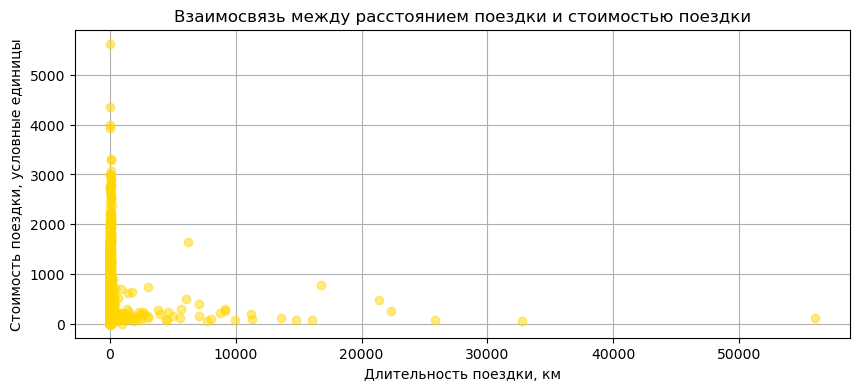

In [33]:
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(df['distance_km'],
         df['nominal_price_rub_amt'],
         marker='o', 
         linestyle='', 
         alpha=0.5, color = 'gold')

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между расстоянием поездки и стоимостью поездки')
plt.xlabel('Длительность поездки, км')
plt.ylabel('Стоимость поездки, условные единицы')
plt.grid()
#plt.yscale('log')
#plt.xscale('log')

# Отображаем график
plt.show() 

Здесь такой зависимости не видно. 

In [34]:
# Посмотрим на распределение числа заказов в зависимости от даты
date_agg = df.groupby('date_event').agg({'party_rk': 'nunique', # общее число уникальных пользователей в день
                                            'order_rk': 'nunique' # число заказов 
                                             }).reset_index()
date_agg.columns = ['date_event', 'unique_users_count', 'unique_orders_count'] # переименуем колонки
date_agg

,date_event,unique_users_count,unique_orders_count
0,2024-04-07,1,1
1,2024-04-09,2,3
2,2024-04-10,1,2
3,2024-04-11,1,1
4,2024-04-12,1,2
...,...,...,...
188,2024-10-17,1515,2008
189,2024-10-18,1605,2165
190,2024-10-19,1261,1686
191,2024-10-20,1133,1517


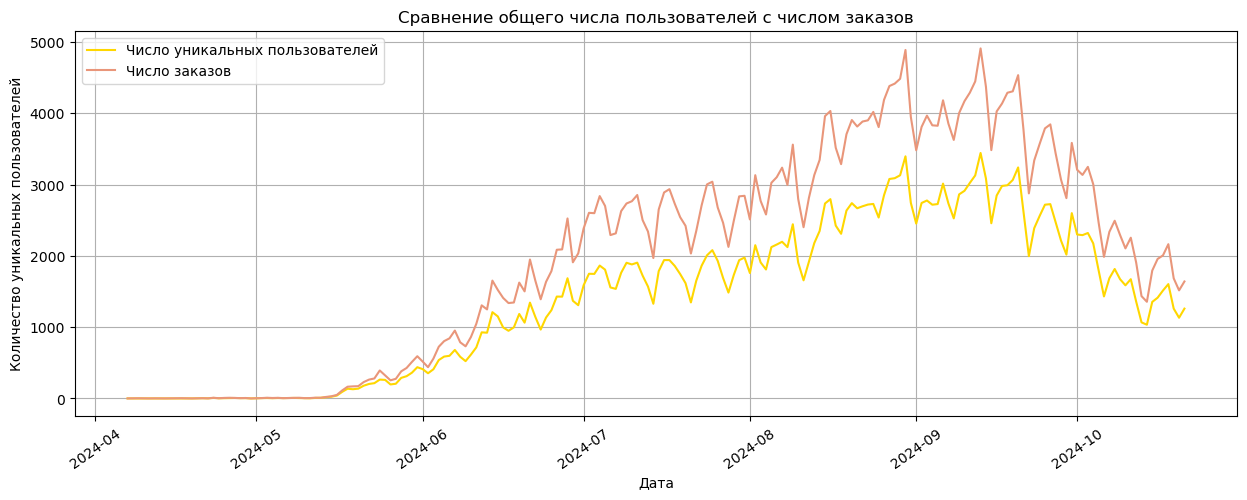

In [35]:
# Построю линейные графики общего числа пользователей и общего числа заказов по дням

x = date_agg.date_event.unique() # задаем ось Ох
y_a = date_agg.unique_users_count # группы по оси Оy
y_b = date_agg.unique_orders_count 

plt.figure(figsize=(15, 5))
plt.plot(x, y_a, label ='Число уникальных пользователей', color = 'gold')
plt.plot(x, y_b,label ='Число заказов', color = 'darksalmon')

plt.xlabel("Дата")
plt.xticks(rotation=35) 
plt.grid(True)
plt.ylabel("Количество уникальных пользователей")
plt.legend()
plt.title('Сравнение общего числа пользователей с числом заказов')
plt.show()

Число пользователей и заказов увеличивается с начало темплого сезона, резко возрастая в июне. В июле держится на одном уровне. К началу сентяря снова возрастает. И постепенно снижается к окнчанию сезона. Также явно видна зависимость от дня недели. В течение месяца видны четкие пики и падения активности.  
Судя по тому, что число пользователей меньше, чем число заказов, есть полоьзователи, которые пользуются самокатом не по одному раху в день. 

### Промежуточный вывод

<div style="background-color:gold;">
    
## Проверка аналитических гипотез 
<a id='stat'></a>
</div>


**Гипотеза 1** звучит так: пользователи мужского пола активнее пользуются сервисом аренды самокатов, чем пользователи женского пола.  Буду использовать одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Среднее число поездок у пользователей мужского пола и женского не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей мужского пола больше, и это различие статистически значимо.

In [36]:
df_gender = df.groupby(['gender_cd', 'party_rk'])['order_rk'].nunique().reset_index()
df_gender

,gender_cd,party_rk,order_rk
0,F,197676,1
1,F,243134,3
2,F,257434,1
3,F,360093,4
4,F,385969,1
...,...,...,...
63557,M,1300448310,1
63558,M,1300455702,2
63559,M,1300625360,1
63560,M,1300923278,1


In [37]:
# буду проводить проверку тестом Уэлча, так как у нас несболансированные выборки

metric_a = df_gender['order_rk'][df_gender['gender_cd']=='M'] ## выборка целевой метрики для пользователей мужского пола
metric_b = df_gender['order_rk'][df_gender['gender_cd']=='F'] ## выборка целевой метрики для пользователей женского пола

alpha = 0.05 ## уровень значимости

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    metric_a, 
    metric_b, 
    equal_var=False,
    alternative='greater' ## альтернативная гипотеза о том, что выборочное среднее первой выборки (metric_a) больше второй выборки
) 
if p_value_welch_ttest>alpha:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 4)}')
    print('Нулевая гипотеза не может быть отвергнута. Выборочные средние у пользователей разных полов равны')
    print('Интерпретация: Среднее число поездок у пользователей мужского и женского пола равны')
else:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 4)}')
    print('Нулевая гипотеза не может быть отвергнута. Выборочные средние у пользователей мужского пола больше')
    print('Интерпретация: Среднее число поездок у пользователей мужского пола статистически значимо больше')

p-value теста Уэлча =0.0
Нулевая гипотеза не может быть отвергнута. Выборочные средние у пользователей мужского пола больше
Интерпретация: Среднее число поездок у пользователей мужского пола статистически значимо больше


**Гипотеза 2**: Школьники и студенты активнее пользуются сервисом аренды самокатов, чем все остальные пользователей. Также буду использовать одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: среднее число использования самокатов у школьников и студентов равно среднему числу аренды самокатов всех остальных пользователей

- Альтернативная гипотеза H₁: среднее число поездок у школьников и студентов больше, чем у всех остальных пользователей вместе взятых.

In [38]:
df_graduate = df.copy()
# Создадам новый столбец
def create_graduate(x):
    if pd.isna(x):
        return 'other'
    if x in ['UGR', 'SCH']: # объединю школьников и студентов
        return 'student'
    return 'other'

df_graduate['graduate']= df_graduate['education_level_cd'].apply(create_graduate)
df_graduate = df_graduate.groupby(['graduate', 'party_rk'])['order_rk'].nunique().reset_index()
df_graduate

,graduate,party_rk,order_rk
0,other,15725,4
1,other,22530,4
2,other,27063,1
3,other,28564,88
4,other,197676,1
...,...,...,...
64047,student,1183354152,4
64048,student,1185502068,2
64049,student,1186414590,57
64050,student,1187120603,3


In [39]:
# буду проводить проверку тестом Уэлча

metric_a = df_graduate['order_rk'][df_graduate['graduate']=='student'] 
metric_b = df_graduate['order_rk'][df_graduate['graduate']=='other'] 


alpha = 0.05 ## уровень значимости

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    metric_a, 
    metric_b, 
    equal_var=False,
    alternative='greater' ## альтернативная гипотеза о том, что выборочное среднее первой выборки (metric_a) больше второй выборки
) 
if p_value_welch_ttest>alpha:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 4)}')
    print('Нулевая гипотеза не может быть отвергнута. Выборочные средние число поездок на пользователя у групп "школьники-студенты" и "остальные пользователи" равны')
    print('Интерпретация: Среднее число поездок у студенов и школьников равно среднему числу поездок у остальных пользователей')
else:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 4)}')
    print('Нулевая гипотеза не может быть принята. Выборочные средние числа поездок у школьников и студентов больше')
    print('Интерпретация: Среднее число поездок у школьников и студентов статистически значимо больше, чем у всех остальных пользователей вместе взятых')

p-value теста Уэлча =0.0071
Нулевая гипотеза не может быть принята. Выборочные средние числа поездок у школьников и студентов больше
Интерпретация: Среднее число поездок у школьников и студентов статистически значимо больше, чем у всех остальных пользователей вместе взятых


**Гипотеза 3**: Пользователи, совершающие короткие поездки (менее 10 минут) приносят большие доход, чем пользователи, использующие самокаты дольше. Также буду использовать одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: средний доход от поездок не превышающих по длительности 10 минут равен среднему доходу от поездок, длительность которых больше либо равно 10 минутам. 

- Альтернативная гипотеза H₁: средний доход от коротких поездок статистически значимо выше, чем от длинных поездок. 

In [40]:
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,date_event,book_duration,is_successful
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30,300,...,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,2024-08-07,0 days 00:20:30.014272,1
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50,300,...,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,2024-10-17,0 days 00:06:54.833607,1
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30,300,...,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,2024-09-19,0 days 00:06:50.688372,1
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50,300,...,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,2024-10-04,0 days 00:02:18.562918,1
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50,300,...,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,2024-07-10,0 days 00:10:05.429337,1


In [41]:
# буду проводить проверку тестом Уэлча

metric_a = df['nominal_price_rub_amt'][df['book_duration']<pd.Timedelta(minutes=10)] 
metric_b = df['nominal_price_rub_amt'][df['book_duration']>=pd.Timedelta(minutes=10)] 


alpha = 0.05 ## уровень значимости

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    metric_a, 
    metric_b, 
    equal_var=False,
    alternative='greater' ## альтернативная гипотеза о том, что выборочное среднее первой выборки (metric_a) больше второй выборки
) 
if p_value_welch_ttest>alpha:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 4)}')
    print('Нулевая гипотеза не может быть отвергнута. Выборочные средние стоимости коротких и длинных поездок равны')
else:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 4)}')
    print('Нулевая гипотеза не может быть отвергнута. Выборочное среднее стоимости коротких поездок статистически значимо больше, чем длинных')

p-value теста Уэлча =1.0
Нулевая гипотеза не может быть отвергнута. Выборочные средние стоимости коротких и длинных поездок равны


<div style="background-color:gold;">
    
## Итоговый вывод
<a id='summary'></a>
</div>

 - Мужчины статистически значимо более часто арендуют самокаты, чем женщины
 - Школьники и студенты чаще пользуются самокатами, чем все остальные пользователи
 - Число поездок, длящихся более 1 минуты, совпадает с общим числом поездок